In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
feast=pd.read_csv('Data/mr_feast_views.csv')

In [3]:
feast=feast.drop_duplicates().drop('License',axis=1).reset_index(drop=True)

In [7]:
feast

,video_id,category,views,days_since_release,views_change
0,VG916,Reaction,2108373.0,27,2108373.0
1,VG916,Reaction,2543481.0,28,435108.0
2,VG916,Reaction,3084828.0,29,541347.0
3,VG916,Reaction,3784331.0,30,699503.0
4,VG916,Reaction,3850877.0,31,66546.0
...,...,...,...,...,...
352,EF797,Reaction,3462724.0,6,687247.0
353,EF797,Reaction,4314741.0,7,852017.0
354,EF797,Reaction,4385874.0,8,71133.0
355,EF797,Reaction,4439840.0,9,53966.0


Build a visualization that compares the distributions of max views of each video for each category

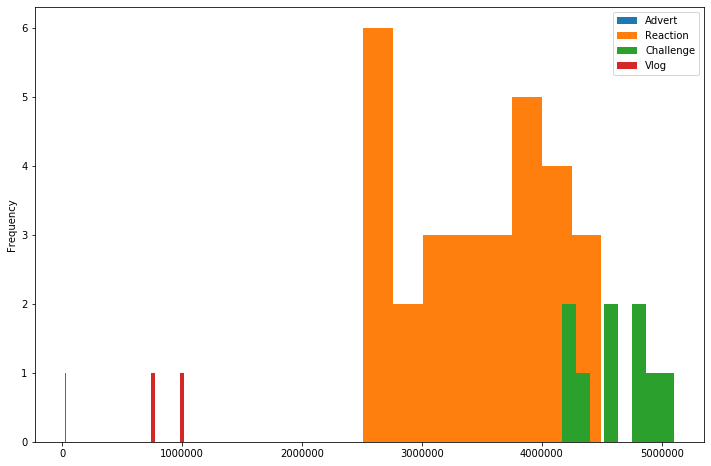

In [33]:
vids=feast.groupby('video_id').max()

fig, ax=plt.subplots(figsize=(12,8))
for cat in vids.category.unique():
    vids[vids.category==cat]['views'].plot(kind='hist',bins=8,label=cat,ax=ax)
    ax.legend()

For each video, apply a label ‘greater than 100000’ or ‘less than 100000’ depending on the total daily views.

In [35]:
feast['label']=feast.views_change.apply(lambda x: 'greater than 100000' if x > 100000 else 'less than 100000')

Build a visualization that compares for each category how many videos fall into the two labels you just made.}

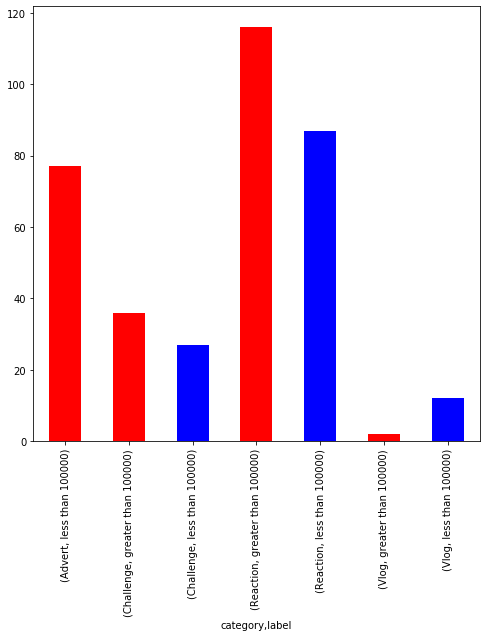

In [54]:
fig,ax = plt.subplots(figsize=(8,8))
feast.groupby(['category','label']).count()['views'].plot(kind='bar',color=['red','red','blue','red','blue','red','blue'])
plt.show()

Build a visualization that compares the relationship between maximum daily views and minimum daily views for each video.

In [56]:
vids_min=feast.groupby('video_id').min()

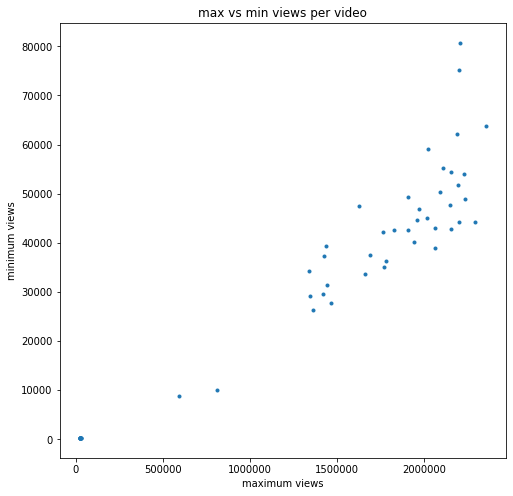

In [64]:
fig,ax=plt.subplots(figsize=(8,8))
ax.plot(vids.views_change,vids_min.views_change,'.')
ax.set_xlabel('maximum views')
ax.set_ylabel('minimum views')
ax.set_title('max vs min views per video')
plt.show()